In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

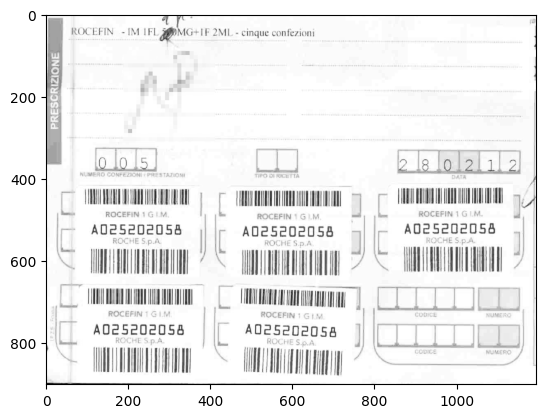

In [2]:
im = cv.imread(r'data/barcodes.jpg', cv.IMREAD_GRAYSCALE)
im_out = cv.imread(r'data/barcodes.jpg')
plt.imshow(im, cmap='Greys_r')

In [3]:
im.shape

(901, 1194)

In [4]:
# 缩放图像
scale = 800.0/im.shape[1]
im = cv.resize(im, (int(im.shape[1]*scale), int(im.shape[0] * scale)))
im.shape

(603, 800)

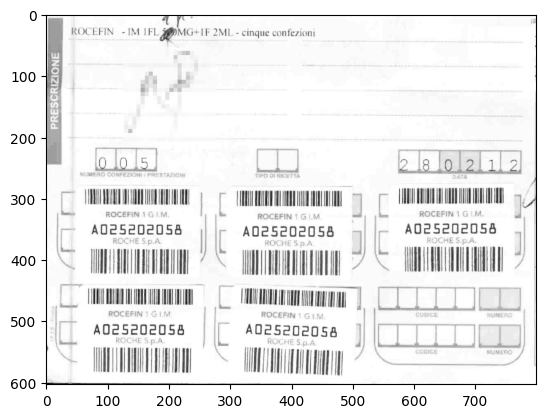

In [5]:
plt.imshow(im, cmap='Greys_r')

In [6]:
# 黑帽 进行闭运算后得到与原始图像的差
kernel = np.ones((1, 3), np.uint8)
im = cv.morphologyEx(im, cv.MORPH_BLACKHAT, kernel, anchor=(1, 0))

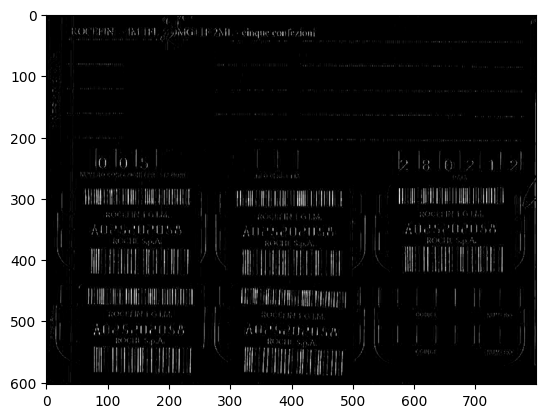

In [7]:
plt.imshow(im, cmap='Greys_r')

In [8]:
# 阈值
thresh, im = cv.threshold(im, 10, 255, cv.THRESH_BINARY)

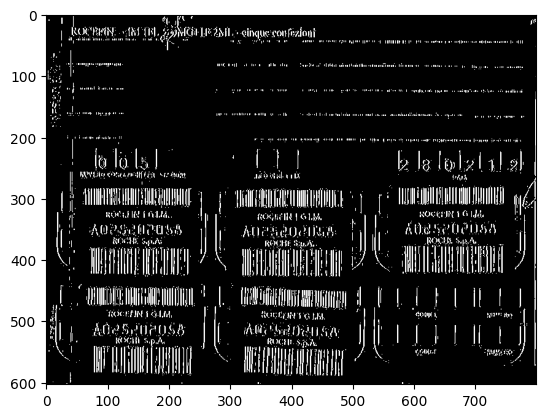

In [9]:
plt.imshow(im, cmap='Greys_r')

In [10]:
kernel = np.ones((1, 5), np.uint8)
im = cv.morphologyEx(im, cv.MORPH_DILATE, kernel, anchor=(2, 0), iterations=2) #dilatazione
im = cv.morphologyEx(im, cv.MORPH_CLOSE, kernel, anchor=(2, 0), iterations=2)  #chiusura

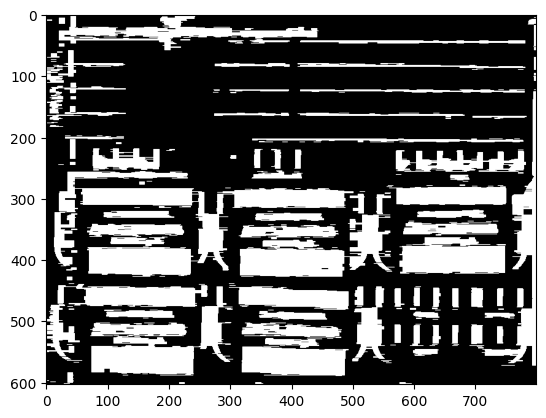

In [11]:
plt.imshow(im, cmap='Greys_r')

In [12]:
kernel = np.ones((21, 35), np.uint8)
im = cv.morphologyEx(im, cv.MORPH_OPEN, kernel, iterations=1)

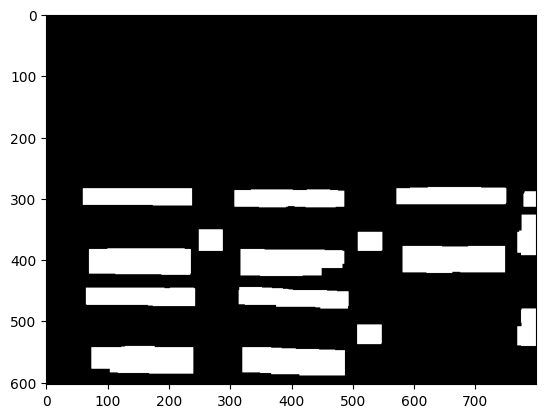

In [13]:
plt.imshow(im, cmap='Greys_r')

In [14]:
#
contours, hierarchy = cv.findContours(im, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

In [15]:
unscale = 1.0 / scale
if contours != None:
    for contour in contours:
        
        # se l'area non è grande a sufficienza la salto 
        if cv.contourArea(contour) <= 2000:
            continue
        
        #estraggo il rettangolo di area minima (in formato (centro_x, centro_y), (width, height), angolo)
        rect = cv.minAreaRect(contour)
        #l'effetto della riscalatura iniziale deve essere eliminato dalle coordinate rilevate
        rect = \
            ((int(rect[0][0] * unscale), int(rect[0][1] * unscale)), \
             (int(rect[1][0] * unscale), int(rect[1][1] * unscale)), \
             rect[2])
        
        
        #disegno il tutto sull'immagine originale
        box = np.int0(cv.boxPoints(rect))
        cv.drawContours(im_out, [box], 0, (0, 255, 0), thickness = 2)

In [1]:
plt.imshow(im_out)
cv.imwrite(r'output/im_out.jpg', im_out)

NameError: name 'plt' is not defined